In [8]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [9]:
from matplotlib import font_manager, rc
font_path= 'C:/Windows/Fonts/NGULIM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#### 통합 데이터 불러오기

In [10]:
df = pd.read_csv('../data_2/full형매변환.csv') 
print(df.shape)

df_copy = df.copy()

# 일단 농가 결측치는 제거
df_copy.dropna(subset=['농가근내평균'], inplace=True)
print(df_copy.shape)

# 형매 결측치 0채우기
print(df_copy.isna().sum())
df_copy.fillna(0, inplace=True)
print('=====')
print(f"결측치 총 개수:{df_copy.isna().sum(axis=1).sum()}")

(99848, 19)
(76307, 19)
개월령              0
생시체중             0
근내평균             0
도체범위근내평균         0
체고               0
체장               0
형매도축수        55263
형매도체평균       55263
형매근내평균       55263
형매근내평균가산     55263
출산여부_6개월내        0
농가근내평균           0
농가근내평균가산         0
근내EPD            0
근내               0
점수               0
농가구분             0
TARGET1          0
형매_bi        55263
dtype: int64
=====
결측치 총 개수:0


##### train_test_split 7:3

###### 결측치 채우고 난 후

In [11]:
print(f"체고 0 인거:{df_copy[df_copy['체고']==0]}")
print(len(df_copy))
df_copy.isna().sum()

체고 0 인거:Empty DataFrame
Columns: [개월령, 생시체중, 근내평균, 도체범위근내평균, 체고, 체장, 형매도축수, 형매도체평균, 형매근내평균, 형매근내평균가산, 출산여부_6개월내, 농가근내평균, 농가근내평균가산, 근내EPD, 근내, 점수, 농가구분, TARGET1, 형매_bi]
Index: []
76307


개월령          0
생시체중         0
근내평균         0
도체범위근내평균     0
체고           0
체장           0
형매도축수        0
형매도체평균       0
형매근내평균       0
형매근내평균가산     0
출산여부_6개월내    0
농가근내평균       0
농가근내평균가산     0
근내EPD        0
근내           0
점수           0
농가구분         0
TARGET1      0
형매_bi        0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X = df_copy.drop(['TARGET1'],axis=1)
Y = df_copy.TARGET1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 2023)

print(f'데이터 셋 70%:{df_copy.shape[0]*0.7}')
print(f'데이터 셋 30%:{df_copy.shape[0]*0.3}')

train = pd.concat([X_train,Y_train], axis=1)
test = pd.concat([X_test,Y_test], axis=1)

print(f'train set:{train.shape[0]}')
print(f'test set:{test.shape[0]}')

데이터 셋 70%:53414.899999999994
데이터 셋 30%:22892.1
train set:53414
test set:22893


In [13]:
model = sm.Logit.from_formula(""" TARGET1 ~ 개월령+ 생시체중+ 
근내평균+도체범위근내평균+체고+체장+형매도축수+형매도체평균+
형매근내평균+형매근내평균가산+C(출산여부_6개월내)
+농가근내평균+농가근내평균가산+근내EPD
+C(농가구분) """, train).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.336551
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                TARGET1   No. Observations:                53414
Model:                          Logit   Df Residuals:                    53398
Method:                           MLE   Df Model:                           15
Date:                Wed, 25 Oct 2023   Pseudo R-squ.:                  0.1825
Time:                        09:36:42   Log-Likelihood:                -17977.
converged:                       True   LL-Null:                       -21991.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.4283      0.770     -7.050      0.000      -6.937      -3.919
C(출산여부_6개월내)[T.Y]    -0.3616      0.033    -10.844      0.000      -0.427      -0.296
C(농가구분)[T.우시장소]       0.2491      0.054      4.589      0.000       0.143       0.355
개월령                  -0.0021      0.002     -1.074      0.283      -0.006       0.002
생시체중                  0.0008      0.000      3.644      0.000       0.000       0.001
근내평균                  0.1255      0.038      3.260      0.001       0.050       0.201
도체범위근내평균              0.7682      0.029     26.333      0.000       0.711       0.825
체고                   -0.0189      0.008     -2.459      0.014      -0.034      -0.004
체장                    0.0065      0.004      1.639      0.101      -0.001       0.014
형매도축수                 0.0034      0.018      0.186      0.853      -0.033       0.039
형매도체평균               -0.0017      0.001     -2.780      0.005      -0.003      -0.001
형매근내평균                0.0816      0.048      1.716      0.086      -0.012       0.175
형매근내평균가산              0.1938      0.050      3.871      0.000       0.096       0.292
농가근내평균                0.0314      0.021      1.511      0.131      -0.009       0.072
농가근내평균가산              0.4758      0.025     18.810      0.000       0.426       0.525
근내EPD                 0.6632      0.070      9.445      0.000       0.526       0.801
=====================================================================================
"""

In [14]:
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

,OR,Lower CI,Upper CI
Intercept,0.004391,0.000971,0.019859
C(출산여부_6개월내)[T.Y],0.696528,0.652455,0.743577
C(농가구분)[T.우시장소],1.282853,1.153393,1.426845
개월령,0.997931,0.994165,1.001711
생시체중,1.000833,1.000385,1.001282
근내평균,1.133668,1.051313,1.222474
도체범위근내평균,2.155937,2.036119,2.282806
체고,0.981319,0.966680,0.996179
체장,1.006472,0.998737,1.014266
형매도축수,1.003410,0.967977,1.040141


In [24]:
train_copy = train.copy()

pred_y_1 = model.predict(train)

train_copy['probability_tr'] = pred_y_1

print(len(train_copy))
train_copy.head()

53414


,개월령,생시체중,근내평균,도체범위근내평균,체고,체장,형매도축수,형매도체평균,형매근내평균,형매근내평균가산,출산여부_6개월내,농가근내평균,농가근내평균가산,근내EPD,근내,점수,농가구분,형매_bi,TARGET1,probability_tr
74658,51,632.14,2.50,2.40,131.1,152.9,0.0,0.00,0.0,0.00,Y,4.44,-0.50,-0.03,3,2,농가소,0,0,0.008032
47151,38,748.21,5.00,5.58,132.7,158.0,0.0,0.00,0.0,0.00,Y,5.67,-0.68,0.29,7,5,농가소,0,1,0.145774
65363,50,737.50,4.19,5.67,129.2,137.1,6.0,377.17,5.0,0.04,Y,5.31,1.13,-0.04,7,4,농가소,3마리이상,0,0.183755
73951,50,867.86,5.12,6.00,129.9,146.7,0.0,0.00,0.0,0.00,Y,5.84,0.48,0.42,8,5,농가소,0,1,0.324711
64019,54,671.43,4.51,4.72,128.1,147.4,0.0,0.00,0.0,0.00,Y,4.73,-0.57,0.06,3,2,농가소,0,0,0.063051


In [28]:
# train set 만들기
test_copy = test.copy()

pred_y = model.predict(test_copy)

test_copy['probability'] = pred_y

print(len(test_copy))
test_copy.head()

22893


,개월령,생시체중,근내평균,도체범위근내평균,체고,체장,형매도축수,형매도체평균,형매근내평균,형매근내평균가산,출산여부_6개월내,농가근내평균,농가근내평균가산,근내EPD,근내,점수,농가구분,형매_bi,TARGET1,probability
24682,58,692.86,4.16,4.54,131.3,154.1,0.0,0.0,0.0,0.00,N,4.67,0.28,0.08,6,4,농가소,0,0,0.108037
99156,48,695.00,5.22,5.33,128.6,149.9,0.0,0.0,0.0,0.00,N,5.67,0.49,0.34,8,5,우시장소,0,1,0.316061
29604,33,650.00,4.93,5.14,125.8,143.9,0.0,0.0,0.0,0.00,N,4.43,-0.62,0.23,6,4,농가소,0,0,0.137561
4970,44,825.00,4.89,5.82,134.9,157.6,0.0,0.0,0.0,0.00,Y,4.42,0.06,0.49,7,5,농가소,0,1,0.241488
98627,30,524.00,4.78,3.80,125.8,143.9,3.0,458.0,4.0,-1.81,Y,6.00,1.52,0.06,4,3,우시장소,3마리이상,0,0.049723


In [45]:
def performance(TP,TN,FP,FN,BETA):
    
    N = TP+TN+FP+FN
    
    Sensitivity=(TP/(TP+FN))*100
    Sensitivity_l=(Sensitivity/100-1.96*math.sqrt( (Sensitivity/100)*(1-(Sensitivity/100))/(TP+FN) ) )*100
    Sensitivity_u=(Sensitivity/100+1.96*math.sqrt( (Sensitivity/100)*(1-(Sensitivity/100))/(TP+FN) ) )*100

    Specificity=(1-FP/(TN+FP))*100
    Specificity_l=(Specificity/100-1.96*math.sqrt( (Specificity/100)*(1-(Specificity/100))/(FP+TN) ) )*100
    Specificity_u=(Specificity/100+1.96*math.sqrt( (Specificity/100)*(1-(Specificity/100))/(FP+TN) ) )*100

    Accuracy=((TP+TN)/(TP+TN+FP+FN))*100
    Accuracy_l=(Accuracy/100-1.96*math.sqrt( (Accuracy/100)*(1-(Accuracy/100))/N ) )*100
    Accuracy_u=(Accuracy/100+1.96*math.sqrt( (Accuracy/100)*(1-(Accuracy/100))/N ) )*100

    PPV= (TP/(TP+FP))*100 
    PPV_l=(PPV/100-1.96*math.sqrt( (PPV/100)*(1-(PPV/100))/(TP+FP) ) )*100
    PPV_u=(PPV/100+1.96*math.sqrt( (PPV/100)*(1-(PPV/100))/(TP+FP) ) )*100

    NPV= (TN/(TN+FN))*100 
    NPV_l=(NPV/100-1.96*math.sqrt( (NPV/100)*(1-(NPV/100))/(TN+FN) ) )*100
    NPV_u=(NPV/100+1.96*math.sqrt( (NPV/100)*(1-(NPV/100))/(TN+FN) ) )*100
    
    F_beta_score = BETA*((PPV*Sensitivity)/(PPV+Sensitivity))
    
    result = {
        'Metric': ['Sensitivity', 'Specificity', 'Accuracy', 'PPV', 'NPV', f'F_{BETA}_score'],
        'Value': [Sensitivity, Specificity, Accuracy, PPV, NPV, F_beta_score],
        'CI_Lower': [Sensitivity_l, Specificity_l, Accuracy_l, PPV_l, NPV_l, None],
        'CI_Upper': [Sensitivity_u, Specificity_u, Accuracy_u, PPV_u, NPV_u, None]
    }
    
    result_2 = pd.DataFrame(result)
    
    return result_2

In [56]:
test_copy['prob_5'] = test_copy['probability'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
test_copy['prob_6'] = test_copy['probability'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
test_copy['prob_7'] = test_copy['probability'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
test_copy['prob_8'] = test_copy['probability'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
test_copy['prob_9'] = test_copy['probability'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

test_copy['prob_85'] = test_copy['probability'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)

In [52]:
train_copy['prob_5'] = train_copy['probability_tr'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
train_copy['prob_6'] = train_copy['probability_tr'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
train_copy['prob_7'] = train_copy['probability_tr'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
train_copy['prob_8'] = train_copy['probability_tr'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
train_copy['prob_9'] = train_copy['probability_tr'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

train_copy['prob_85'] = train_copy['probability_tr'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


In [32]:
print(len(test_copy[test_copy['prob_5'].isnull()==False]))
print(len(test_copy[test_copy['prob_6'].isnull()==False]))
print(len(test_copy[test_copy['prob_7'].isnull()==False]))
print(len(test_copy[test_copy['prob_8'].isnull()==False]))
print(len(test_copy[test_copy['prob_9'].isnull()==False]))

22893
22893
22893
22893
22893


In [33]:
print(f"5이상개수:{len(test_copy[test_copy['점수']==5])}")
print(f"TARGET1개수:{len(test_copy[test_copy['TARGET1']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(test_copy[test_copy['probability']>=0.5])}")
print(f"prob_5개수:{len(test_copy[test_copy['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(test_copy[test_copy['probability']>=0.6])}")
print(f"prob_6개수:{len(test_copy[test_copy['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(test_copy[test_copy['probability']>=0.7])}")
print(f"prob_7개수:{len(test_copy[test_copy['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(test_copy[test_copy['probability']>=0.8])}")
print(f"prob_8개수:{len(test_copy[test_copy['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(test_copy[test_copy['probability']>=0.9])}")
print(f"prob_9개수:{len(test_copy[test_copy['prob_9']==1])}")

5이상개수:3321
TARGET1개수:3321
0.5이상개수:854
prob_5개수:854
0.6이상개수:404
prob_6개수:404
0.7이상개수:138
prob_7개수:138
0.8이상개수:39
prob_8개수:39
0.9이상개수:8
prob_9개수:8


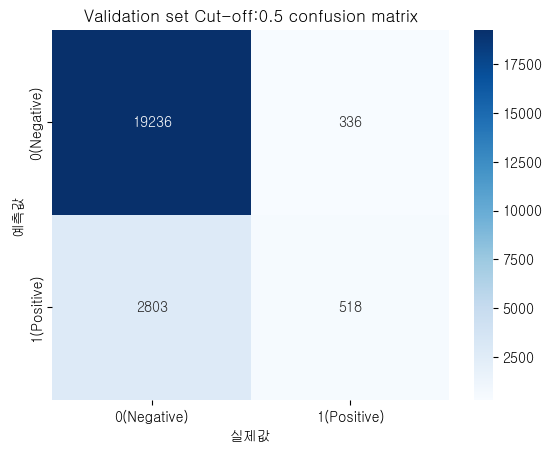

True Positive:518
True Negative:19236
False Positive:336
False Negative:2803


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,15.597712,14.363672,16.831751
1,Specificity,98.283262,98.101279,98.465245
2,Accuracy,86.288385,85.842806,86.733965
3,PPV,60.655738,57.379286,63.932190
4,NPV,87.281637,86.841754,87.721520
5,F_0.5_score,6.203593,NaN,NaN


In [64]:
# cut-off 0.5 validation set
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_5'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Validation set Cut-off:0.5 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_5']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_5']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_5']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_5']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=len(test_copy[(test_copy['prob_5']==1)&(test_copy['TARGET1']==1)]),
            TN=len(test_copy[(test_copy['prob_5']==0)&(test_copy['TARGET1']==0)]),
            FP=len(test_copy[(test_copy['prob_5']==1)&(test_copy['TARGET1']==0)]),
            FN=len(test_copy[(test_copy['prob_5']==0)&(test_copy['TARGET1']==1)]),
            BETA=0.5)

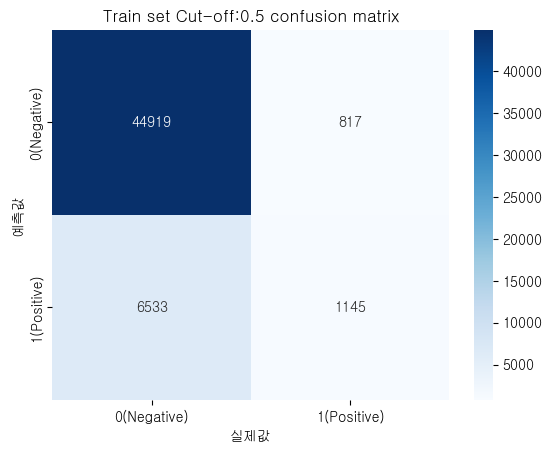

True Positive:1145
True Negative:44919
False Positive:817
False Negative:6533


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,14.912738,14.115949,15.709526
1,Specificity,98.213661,98.092268,98.335054
2,Accuracy,86.239563,85.947418,86.531707
3,PPV,58.358818,56.177488,60.540147
4,NPV,87.302729,87.015039,87.590418
5,F_0.5_score,5.938797,NaN,NaN


In [50]:
# cut-off 0.5 train set
cm = confusion_matrix(train_copy['TARGET1'],train_copy['prob_5'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Train set Cut-off:0.5 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(train_copy[(train_copy['prob_5']==1)&(train_copy['TARGET1']==1)])}")
print(f"True Negative:{len(train_copy[(train_copy['prob_5']==0)&(train_copy['TARGET1']==0)])}")
print(f"False Positive:{len(train_copy[(train_copy['prob_5']==1)&(train_copy['TARGET1']==0)])}")
print(f"False Negative:{len(train_copy[(train_copy['prob_5']==0)&(train_copy['TARGET1']==1)])}")

performance(TP=len(train_copy[(train_copy['prob_5']==1)&(train_copy['TARGET1']==1)]),
            TN=len(train_copy[(train_copy['prob_5']==0)&(train_copy['TARGET1']==0)]),
            FP=len(train_copy[(train_copy['prob_5']==1)&(train_copy['TARGET1']==0)]),
            FN=len(train_copy[(train_copy['prob_5']==0)&(train_copy['TARGET1']==1)]),
            BETA=0.5)

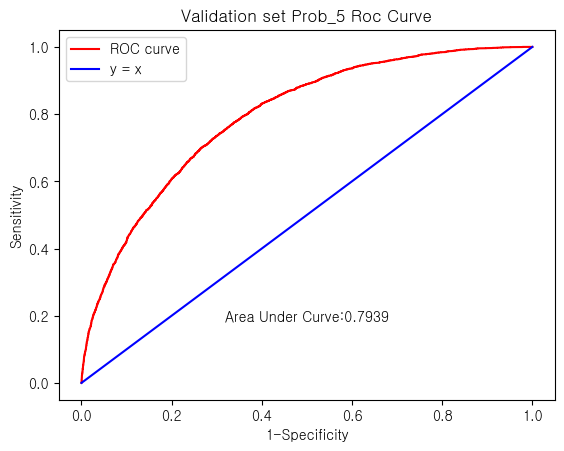

In [42]:
# roc curve, auc validation set
fpr, tpr, thresholds = roc_curve(test_copy['TARGET1'], test_copy['probability'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(test_copy['TARGET1'], test_copy['probability'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Validation set Prob_5 Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

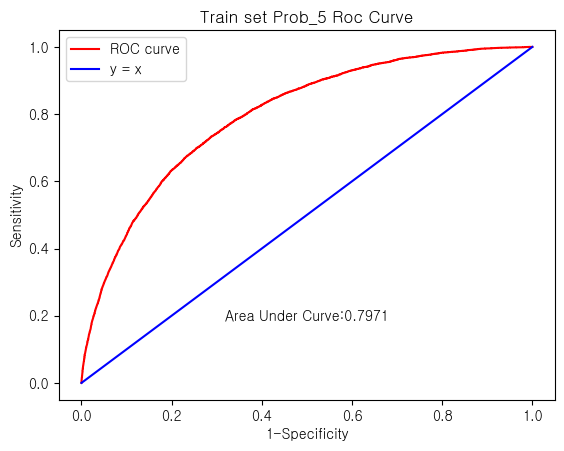

In [43]:
# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(train_copy['TARGET1'], train_copy['probability_tr'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(train_copy['TARGET1'], train_copy['probability_tr'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Train set Prob_5 Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

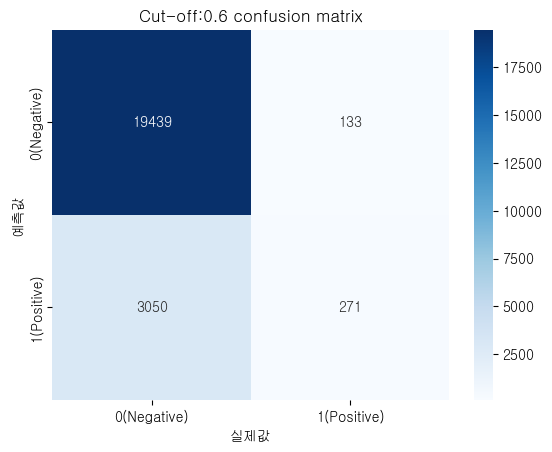

True Positive:271
True Negative:19439
False Positive:133
False Negative:3050


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,8.160193,7.229112,9.091273
1,Specificity,99.320458,99.205360,99.435555
2,Accuracy,86.096187,85.647995,86.544378
3,PPV,67.079208,62.496792,71.661624
4,NPV,86.437814,85.990320,86.885309
5,F_1_score,7.275168,NaN,NaN


In [31]:
# cut-off 0.6
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_6'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.6 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_6']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_6']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_6']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_6']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=271,TN=19439,FP=133,FN=3050,BETA=1)

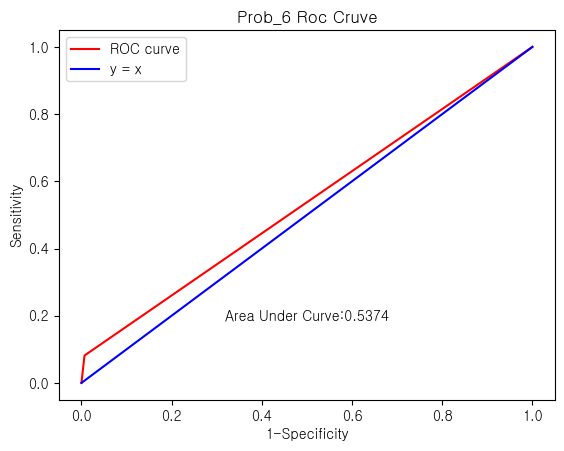

In [32]:
# roc curve, auc
fpr, tpr, thresholds = roc_curve(test_copy['TARGET1'], test_copy['prob_6'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(test_copy['TARGET1'], test_copy['prob_6'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Prob_6 Roc Cruve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

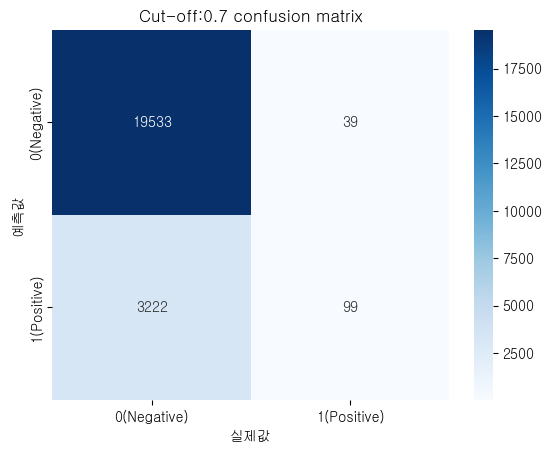

True Positive:99
True Negative:19533
False Positive:39
False Negative:3222


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,2.981030,2.402623,3.559436
1,Specificity,99.800736,99.738259,99.863213
2,Accuracy,85.755471,85.302720,86.208222
3,PPV,71.739130,64.226581,79.251680
4,NPV,85.840475,85.387485,86.293464
5,F_1_score,2.862099,NaN,NaN


In [34]:
# cut-off 0.7
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_7'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.7 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_7']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_7']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_7']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_7']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=99,TN=19533,FP=39,FN=3222,BETA=1)

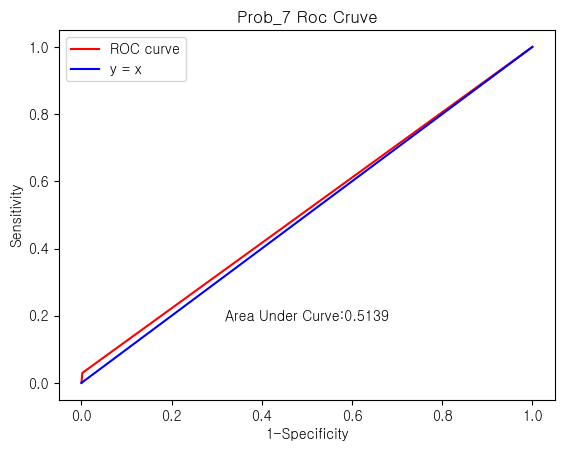

In [35]:
# roc curve, auc
fpr, tpr, thresholds = roc_curve(test_copy['TARGET1'], test_copy['prob_7'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(test_copy['TARGET1'], test_copy['prob_7'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Prob_7 Roc Cruve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

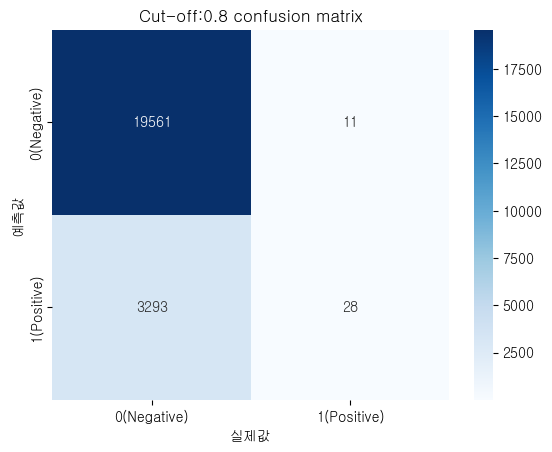

True Positive:28
True Negative:19561
False Positive:11
False Negative:3293


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,0.843120,0.532143,1.154096
1,Specificity,99.943797,99.910593,99.977002
2,Accuracy,85.567641,85.112414,86.022868
3,PPV,71.794872,57.671626,85.918118
4,NPV,85.591144,85.135837,86.046451
5,F_1_score,0.833333,NaN,NaN


In [37]:
# cut-off 0.8
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_8'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.8 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_8']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_8']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_8']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_8']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=28,TN=19561,FP=11,FN=3293,BETA=1)

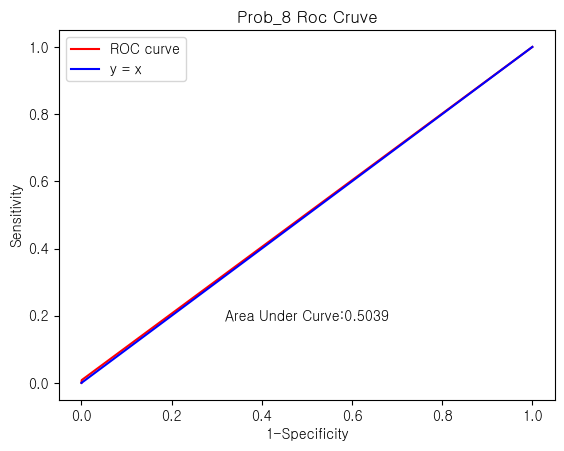

In [38]:
# roc curve, auc
fpr, tpr, thresholds = roc_curve(test_copy['TARGET1'], test_copy['prob_8'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(test_copy['TARGET1'], test_copy['prob_8'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Prob_8 Roc Cruve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

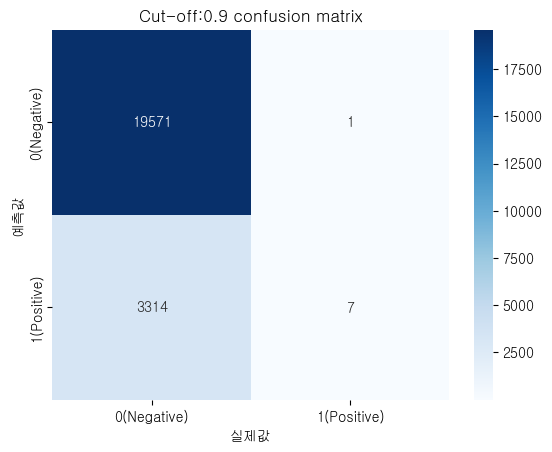

True Positive:7
True Negative:19571
False Positive:1
False Negative:3314


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,0.210780,0.054797,0.366763
1,Specificity,99.994891,99.984877,100.004905
2,Accuracy,85.519591,85.063735,85.975447
3,PPV,87.500000,64.582349,110.417651
4,NPV,85.518899,85.062954,85.974844
5,F_1_score,0.210273,NaN,NaN


In [40]:
# cut-off 0.9
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_9'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.9 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_9']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_9']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_9']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_9']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=7,TN=19571,FP=1,FN=3314,BETA=1)

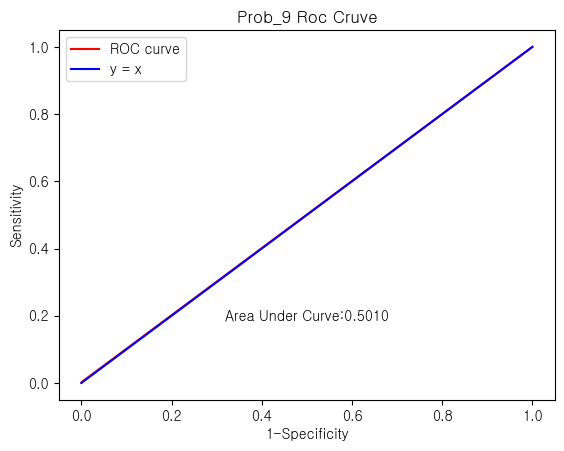

In [41]:
# roc curve, auc
fpr, tpr, thresholds = roc_curve(test_copy['TARGET1'], test_copy['prob_9'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(test_copy['TARGET1'], test_copy['prob_9'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Prob_9 Roc Cruve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

##### 0.85

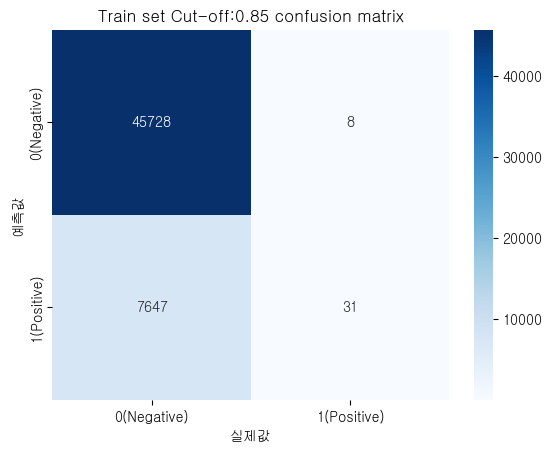

True Positive:31
True Negative:45728
False Positive:8
False Negative:7647


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,0.403751,0.261907,0.545595
1,Specificity,99.982508,99.970388,99.994628
2,Accuracy,85.668551,85.371395,85.965707
3,PPV,79.487179,66.814017,92.160342
4,NPV,85.673068,85.375843,85.970293
5,F_0.5_score,0.200855,NaN,NaN


In [62]:
# cut-off 0.85 train
cm = confusion_matrix(train_copy['TARGET1'], train_copy['prob_85'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Train set Cut-off:0.85 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(train_copy[(train_copy['prob_85']==1)&(train_copy['TARGET1']==1)])}")
print(f"True Negative:{len(train_copy[(train_copy['prob_85']==0)&(train_copy['TARGET1']==0)])}")
print(f"False Positive:{len(train_copy[(train_copy['prob_85']==1)&(train_copy['TARGET1']==0)])}")
print(f"False Negative:{len(train_copy[(train_copy['prob_85']==0)&(train_copy['TARGET1']==1)])}")

performance(TP=len(train_copy[(train_copy['prob_85']==1)&(train_copy['TARGET1']==1)]),
            TN=len(train_copy[(train_copy['prob_85']==0)&(train_copy['TARGET1']==0)]),
            FP=len(train_copy[(train_copy['prob_85']==1)&(train_copy['TARGET1']==0)]),
            FN=len(train_copy[(train_copy['prob_85']==0)&(train_copy['TARGET1']==1)]),
            BETA=0.5)

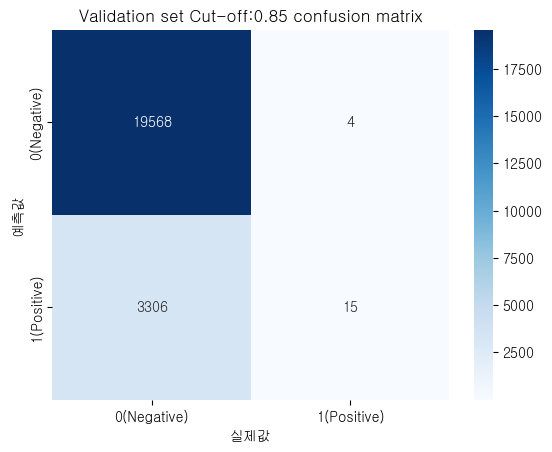

True Positive:15
True Negative:19568
False Positive:4
False Negative:3306


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,0.451671,0.223611,0.679732
1,Specificity,99.979563,99.959536,99.999589
2,Accuracy,85.541432,85.085861,85.997002
3,PPV,78.947368,60.615729,97.279007
4,NPV,85.546909,85.091221,86.002597
5,F_0.5_score,0.224551,NaN,NaN


In [63]:
# cut-off 0.85 validation
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_85'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Validation set Cut-off:0.85 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_85']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_85']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_85']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_85']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=len(test_copy[(test_copy['prob_85']==1)&(test_copy['TARGET1']==1)]),
            TN=len(test_copy[(test_copy['prob_85']==0)&(test_copy['TARGET1']==0)]),
            FP=len(test_copy[(test_copy['prob_85']==1)&(test_copy['TARGET1']==0)]),
            FN=len(test_copy[(test_copy['prob_85']==0)&(test_copy['TARGET1']==1)]),
            BETA=0.5)